## ROUND HILL 1

SO2_CONCENTRATIONS_1.CSV - EmissionRate_and_Coorections.csv - Metrology.csv

In [4]:
import os
from datetime import datetime

import numpy as np
import pandas as pd

os.chdir(os.getcwd() + "\\..\\data\\")

In [5]:
#Importiamo le librerie 
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import MinMaxScaler

#Leggiamo il dataset
dataset = pd.read_csv('SO2_Concentrations_1.csv')
#dataset.head()

df_corrections = pd.read_csv('EmissionRate_and_Corrections.csv')
#df_corrections.head()

#
df_meteo = pd.read_csv('Meteorology.csv')
#df_meteo.head()

# Sostituire il valore -99 (considerato come "Missing valuse") con NaN
df_meteo.replace(-99, np.nan, inplace=True)
#df_meteo.head()


Migliorare la lettura del dataset 'SO2_Concentrations_1.csv', eliminando la riga "Run #" e impostandola come colonna specifica
(ci servirà per un merge successivo).

In [6]:
# Leggi tutte le righe del file
with open('SO2_Concentrations_1.csv', "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f if line.strip()]

data = []
run_id = None
header = None

for line in lines:
    if line.startswith("Run"):
        run_id = line.strip()  # Es: "Run 1"
    elif header is None:
        # Prima intestazione
        header = line.split(",")
        header = [h.strip() for h in header]
    else:
        # Riga di dati
        values = line.split(",")
        values = [v.strip() for v in values]
        # Padding per righe più corte
        values += [None] * (len(header) - len(values))
        row = dict(zip(header, values))
        row["Run"] = run_id
        data.append(row)

# Crea il DataFrame
new_df = pd.DataFrame(data)

# Conversione numerica automatica dove possibile
new_df = new_df.apply(pd.to_numeric, errors='ignore')

# Rimuovi spazi bianchi e converti in float (forzata perché altrimenti dava type = 'object')
for col in ["Wind-Dir (%)","Concentrations (mg/m3) 50", "Concentrations (mg/m3) 100", "Concentrations (mg/m3) 200"]:
    new_df[col] = pd.to_numeric(new_df[col], errors="coerce")

# Estrai solo il numero dal campo "Run" e mettilo come intero
new_df["Run"] = new_df["Run"].astype(str).str.extract(r"(\d+)").astype(int)

# Porta la colonna "Run" come prima colonna
# Ottieni la lista di tutte le colonne
cols = new_df.columns.tolist()
# Sposta "Run" in prima posizione
cols.insert(0, cols.pop(cols.index("Run")))
# Riordina il DataFrame
new_df = new_df[cols]

# Risultato
# print(new_df.head(1))
# print(new_df.tail(1))



C:\Users\abbon\AppData\Local\Temp\ipykernel_14420\1244781057.py:30: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  new_df = new_df.apply(pd.to_numeric, errors='ignore')


## Data Understanding

In [7]:
# new_df.keys()

In [8]:
new_df

,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),Concentrations (mg/m3) 50,Concentrations (mg/m3) 100,Concentrations (mg/m3) 200
0,1,7,18,43,NaN,NaN,NaN,NaN
1,1,8,21,46,NaN,NaN,NaN,NaN
2,1,9,24,49,NaN,NaN,NaN,0.010
3,1,10,27,52,0.42,NaN,NaN,0.015
4,1,11,30,55,NaN,NaN,NaN,0.005
...,...,...,...,...,...,...,...,...
897,29,27,78,103,4.32,3.330,0.38,0.035
898,29,28,81,106,0.66,0.710,0.07,NaN
899,29,29,84,109,0.17,0.015,NaN,NaN
900,29,30,87,112,0.17,NaN,NaN,NaN


In [9]:
#Visualizziamo i tipi delle colonne
print(f"{new_df.dtypes}\n")

n_samples, n_features = new_df.shape

print("Numero di samples/righe, Numero di colonne:")
print((n_samples, n_features))

Run                             int64
Post Number                     int64
Degrees                         int64
Azimuth (Degrees)               int64
Wind-Dir (%)                  float64
Concentrations (mg/m3) 50     float64
Concentrations (mg/m3) 100    float64
Concentrations (mg/m3) 200    float64
dtype: object

Numero di samples/righe, Numero di colonne:
(902, 8)


In [10]:
new_df.describe()

,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),Concentrations (mg/m3) 50,Concentrations (mg/m3) 100,Concentrations (mg/m3) 200
count,902.000000,902.000000,902.000000,902.000000,728.000000,757.000000,636.000000,519.000000
mean,13.465632,30.002217,87.006652,112.006652,3.982143,7.760945,3.388656,1.480906
std,8.329403,14.292178,42.876535,42.876535,4.082794,12.876222,6.833575,5.183185
min,1.000000,1.000000,0.000000,25.000000,0.160000,0.010000,0.005000,0.005000
25%,6.000000,19.000000,54.000000,79.000000,0.837500,0.540000,0.191250,0.060000
50%,13.000000,29.000000,84.000000,109.000000,2.490000,3.240000,1.005000,0.270000
75%,20.000000,40.000000,117.000000,142.000000,5.910000,8.350000,2.690000,0.690000
max,29.000000,62.000000,183.000000,208.000000,22.670000,131.000000,67.700000,96.000000


In [11]:
#Verifica dati mancanti 

missing_values = new_df.isnull().sum()
print(missing_values)

Run                             0
Post Number                     0
Degrees                         0
Azimuth (Degrees)               0
Wind-Dir (%)                  174
Concentrations (mg/m3) 50     145
Concentrations (mg/m3) 100    266
Concentrations (mg/m3) 200    383
dtype: int64


In [12]:
# Istogrammi per la distribuzione delle feature numeriche

# new_df.hist(bins=20, figsize=(16, 12), edgecolor='black')
# plt.suptitle("Istogrammi per la distribuzione delle feature numeriche", fontsize=27)
# plt.show()

In [13]:
#Show the relationship between the columns:

# MATRICE DI CORRELAZIONE
corr_matrix = new_df.corr(numeric_only=True)
#plt.figure(figsize=(15,15))
#plot = sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, fmt='.2f', cmap='GnBu', robust=True)
#plt.title('Matrice di correlazione')

# new_df.corr()     #stessa identica cosa del plot di sopra.

#Il risultato del corr() metodo è una tabella con molti numeri che rappresentano il livello di relazione tra due colonne.
#Il numero varia da -1 a 1:
    #1 significa che esiste una relazione 1 a 1 (una correlazione perfetta)
    #Anche 0,9 è un buon rapporto: se si aumenta un valore, probabilmente aumenterà anche l'altro.
    #-0,9 sarebbe un rapporto altrettanto buono di 0,9, ma se si aumenta un valore, l'altro probabilmente diminuirà.
    #0,2 significa NON un buon rapporto, nel senso che se un valore aumenta non significa che lo farà anche l'altro.

## Data cleaning

In [14]:
## Funzione per regolare le cifre significative

def regola_cifre_significative(valore, cifre):
    if pd.isna(valore):  # Gestisce i NaN
        return valore
    else:
        return float(f"{valore:.{cifre}g}")

# Applica la funzione a tutto il dataset
cifre_significative = 5  ##tutte es 9.2548

Data imputation easy: sostituire NaN con la media

In [15]:
def fillna_with_mean(df, col_names, cifre_significative, regola_cifre_significative):
    """
    Per ciascuna colonna in col_names:
    - calcola la media ignorando i NaN
    - arrotonda la media alle cifre significative date
    - sostituisce i NaN della colonna con la media arrotondata

    Args:
        df: il DataFrame da modificare
        col_names: lista di colonne su cui operare
        cifre_significative: numero di cifre significative per l'arrotondamento
        regola_cifre_significative: funzione che arrotonda un numero alle cifre significative
    Returns:
        None (modifica df in-place)
    """
    for col in col_names:
        mean_val = df[col].mean()
        mean_val = regola_cifre_significative(mean_val, cifre_significative)
        df[col].fillna(mean_val, inplace=True)

In [16]:
colonne = [
    "Wind-Dir (%)",
    "Concentrations (mg/m3) 50",
    "Concentrations (mg/m3) 100",
    "Concentrations (mg/m3) 200"
]
# Applica la funzione per riempire i NaN con la media arrotondata al numero di cifre significative fornito
fillna_with_mean(new_df, colonne, cifre_significative, regola_cifre_significative)

C:\Users\abbon\AppData\Local\Temp\ipykernel_14420\1190740189.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)


In [17]:
# new_df

## Merge

Questo merge e questa moltiplicazione andava fatta in quanto nel foglio excel EmissionRate_and_Corrections c'è proprio scritto che il valore delle colonne "Evaporation Corrections #" dovevano essere moltiplicare con le colonne "Concentrations (mg/m3) #" per una sorta di correzione: per compensare la perdita per evaporazione della 'impinger solution' durante l'aerazione.

(nel pdf c'è proprio il disegno dei macchinari)

In [18]:
# Rinomina per uniformare
df_corrections.rename(columns={'Run Number': 'Run'}, inplace=True)

# Merge su "Run"
df_merged = pd.merge(new_df, df_corrections, on='Run', how='left')

funzione che ci consente di applicare la correzione richiesta: moltiplicare le colonne "Concentrations (mg/m3) #" con le colonne dell'altro dataset "Evaporation Corrections #"

In [19]:
def apply_evaporation_corrections(df, mapping, prefix="Corrected_"):
    """
    Crea nuove colonne moltiplicando i valori di ciascuna colonna_concentrazione per la rispettiva colonna_correzione.

    Args:
        df: DataFrame di input (modifica in-place)
        mapping: lista di tuple (colonna_concentrazione, colonna_correzione)
        prefix: prefisso per il nome della nuova colonna risultante
    Returns:
        None
    """
    for conc_col, corr_col in mapping:
        new_col = f"{prefix}{conc_col}"
        df[new_col] = df[conc_col] * df[corr_col]

In [20]:
mapping = [
    ("Concentrations (mg/m3) 50", "Evaporation Corrections 50"),
    ("Concentrations (mg/m3) 100", "Evaporation Corrections 100"),
    ("Concentrations (mg/m3) 200", "Evaporation Corrections 200"),
]
apply_evaporation_corrections(df_merged, mapping)

In [21]:
# Salva tutto in new_df, con le colonne corrette e senza aggiunte
new_df = df_merged.drop(columns=[
    'Concentrations (mg/m3) 50', 
    'Concentrations (mg/m3) 100', 
    'Concentrations (mg/m3) 200',
    'Evaporation Corrections 50',
    'Evaporation Corrections 100',
    'Evaporation Corrections 200',
    'Q (g/s)'
])

# new_df.head(1)

In [22]:
# Applica la funzione regola_cifre_significative() a tutte le colonne del DataFrame (di nuovo)
new_df = new_df.applymap(lambda x: regola_cifre_significative(x, cifre_significative) if isinstance(x, (int, float)) else x)

new_df.head()

C:\Users\abbon\AppData\Local\Temp\ipykernel_14420\670091081.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_df = new_df.applymap(lambda x: regola_cifre_significative(x, cifre_significative) if isinstance(x, (int, float)) else x)


,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),Corrected_Concentrations (mg/m3) 50,Corrected_Concentrations (mg/m3) 100,Corrected_Concentrations (mg/m3) 200
0,1.0,7.0,18.0,43.0,3.9821,7.2176,3.1515,1.3624
1,1.0,8.0,21.0,46.0,3.9821,7.2176,3.1515,1.3624
2,1.0,9.0,24.0,49.0,3.9821,7.2176,3.1515,0.0092
3,1.0,10.0,27.0,52.0,0.4200,7.2176,3.1515,0.0138
4,1.0,11.0,30.0,55.0,3.9821,7.2176,3.1515,0.0046


## ROUND HILL 2

SO2_Concentration_Hill2.csv - Emission_Hill2.csv - Metrology_HILL2.csv
  

Conversione .xlsx in .csv

In [23]:
#⚠️⚠️⚠️⚠️⚠️⚠️⚠️ FARLO UNA VOLTA E BASTA, ALTRIMENTI RICARICA I CSV E CANCELLA TUTTE LE CORREZIONI FATTE A MANO NEL CSV ⚠️⚠️⚠️⚠️⚠️⚠️⚠️

#import pandas as pd

# Inserisci i percorsi dei tuoi file Excel
file1_path = "Metrology_HILL2.xlsx"
file2_path = "SO2_Concentration_Hill2.xlsx"
file3_path = "Emission_Hill2.xlsx"

# Caricamento dei file Excel
#metrology_df = pd.read_excel(file1_path)
#so2_df = pd.read_excel(file2_path)
#emission_df = pd.read_excel("Emission_Hill2.xlsx")

# Salvataggio in formato CSV
#metrology_df.to_csv("Metrology_HILL2.csv", index=False)
#so2_df.to_csv("SO2_Concentration_Hill2.csv", index=False)
#emission_df.to_csv("Emission_Hill2.csv", index=False)

# print("Conversione completata! I file CSV sono stati creati.")

In [24]:
# lettura dei file CSV
metrology_df = pd.read_csv("Metrology_HILL2.csv")
so2_df = pd.read_csv("SO2_Concentration_Hill2.csv")
emission_df = pd.read_csv("Emission_Hill2.csv")

Migliorare la leggibilità di SO2_Concentration_Hill2.csv, eliminando la riga "Run #" e impostandola come colonna specifica
(ci servirà per un merge successivo).

In [25]:
# Leggi tutte le righe del file
with open("SO2_Concentration_Hill2.csv", "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f if line.strip()]

data = []
run_id = None
header = None

for line in lines:
    if line.startswith("Run"):
        run_id = line.strip()  # Es: "Run 1"
    elif header is None:
        # Prima intestazione
        header = line.split(",")
        header = [h.strip() for h in header]
    else:
        # Riga di dati
        values = line.split(",")
        values = [v.strip() for v in values]
        # Padding per righe più corte
        values += [None] * (len(header) - len(values))
        row = dict(zip(header, values))
        row["Run"] = run_id
        data.append(row)

# Crea il DataFrame
new_so2_df = pd.DataFrame(data)

# Conversione numerica automatica dove possibile
new_so2_df = new_so2_df.apply(pd.to_numeric, errors='ignore')

# Estrai solo il numero dal campo "Run" e mettilo come intero
new_so2_df["Run"] = new_so2_df["Run"].astype(str).str.extract(r"(\d+)").astype(int)

# Porta la colonna "Run" come prima colonna
# Ottieni la lista di tutte le colonne
cols = new_so2_df.columns.tolist()
# Sposta "Run" in prima posizione
cols.insert(0, cols.pop(cols.index("Run")))
# Riordina il DataFrame
new_so2_df = new_so2_df[cols]

# Risultato
# print(new_so2_df.head(1))
# print(new_so2_df.tail(1))

#new_so2_df.head()


C:\Users\abbon\AppData\Local\Temp\ipykernel_14420\1417309593.py:30: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  new_so2_df = new_so2_df.apply(pd.to_numeric, errors='ignore')


Eliminare le colonne specificate perché ridondanti

In [26]:
new_so2_df= new_so2_df.drop(columns=["2-Post Number", "3-Post Number", "4-Post Number"])

new_so2_df.head()

,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),10-min Concentrations (mg/m3) 50,10-min Concentrations (mg/m3) 100,10-min Concentrations (mg/m3) 200,3-min Concentrations (mg/m3) 50,3-min Concentrations (mg/m3) 100,3-min Concentrations (mg/m3) 200,0.5-min Concentrations (mg/m3) 50,0.5-min Concentrations (mg/m3) 100,0.5-min Concentrations (mg/m3) 200,Height (m),10-min Vertical Samples Concentrations (mg/m3) 50,10-min Vertical Samples Concentrations (mg/m3) 100,10-min Vertical Samples Concentrations (mg/m3) 200
0,1,37,1.5,76.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,37,1.5,76.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,38,1.5,78.0,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,39,1.5,79.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,40,1.5,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Understandig

In [27]:
#Visualizziamo i tipi delle colonne
print(f"{new_so2_df.dtypes}\n")

n_samples, n_features = new_so2_df.shape

print("Numero di samples/righe, Numero di colonne:")
print((n_samples, n_features))

Run                                                     int64
Post Number                                             int64
Degrees                                               float64
Azimuth (Degrees)                                     float64
Wind-Dir (%)                                          float64
10-min Concentrations (mg/m3) 50                      float64
10-min Concentrations (mg/m3) 100                     float64
10-min Concentrations (mg/m3) 200                     float64
3-min Concentrations (mg/m3) 50                       float64
3-min Concentrations (mg/m3) 100                      float64
3-min Concentrations (mg/m3) 200                      float64
0.5-min Concentrations (mg/m3) 50                     float64
0.5-min Concentrations (mg/m3) 100                    float64
0.5-min Concentrations (mg/m3) 200                    float64
Height (m)                                            float64
10-min Vertical Samples Concentrations (mg/m3) 50     float64
10-min V

In [28]:
new_so2_df.describe()

,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),10-min Concentrations (mg/m3) 50,10-min Concentrations (mg/m3) 100,10-min Concentrations (mg/m3) 200,3-min Concentrations (mg/m3) 50,3-min Concentrations (mg/m3) 100,3-min Concentrations (mg/m3) 200,0.5-min Concentrations (mg/m3) 50,0.5-min Concentrations (mg/m3) 100,0.5-min Concentrations (mg/m3) 200,Height (m),10-min Vertical Samples Concentrations (mg/m3) 50,10-min Vertical Samples Concentrations (mg/m3) 100,10-min Vertical Samples Concentrations (mg/m3) 200
count,568.000000,568.000000,568.0,568.000000,234.000000,237.000000,198.000000,154.000000,351.000000,278.000000,224.000000,264.000000,198.000000,144.000000,137.000000,136.000000,78.000000,60.000000
mean,5.658451,52.984155,1.5,100.476232,4.273504,77.101781,27.959217,8.915799,111.492761,41.867317,9.799205,154.550795,64.134949,11.471667,4.847445,86.326191,29.573128,9.330500
std,2.950425,18.677381,0.0,28.016071,3.633719,97.552207,49.943548,19.006679,138.146072,62.434665,20.479717,178.479488,98.025240,9.636693,26.608162,145.512940,72.944960,36.376134
min,1.000000,9.000000,1.5,34.500000,0.420000,-99.000000,0.013000,0.038000,-99.000000,0.073000,-99.000000,-99.000000,0.560000,0.400000,0.500000,0.026000,-99.000000,-99.000000
25%,3.000000,39.000000,1.5,79.500000,1.250000,5.890000,2.122500,1.012500,13.750000,4.347500,1.230000,23.100000,8.440000,3.095000,0.500000,10.650000,3.535000,1.150000
50%,6.000000,53.000000,1.5,100.500000,3.330000,41.400000,14.200000,3.380000,66.000000,21.700000,5.300000,106.000000,24.000000,9.200000,1.000000,44.500000,11.550000,2.765000
75%,8.000000,67.250000,1.5,121.875000,6.542500,106.000000,29.075000,8.782500,149.000000,47.700000,12.225000,214.500000,78.700000,18.200000,2.500000,110.000000,25.825000,11.725000
max,10.000000,95.000000,1.5,163.500000,25.420000,494.000000,285.000000,137.000000,663.000000,383.000000,131.000000,1088.000000,476.000000,41.000000,264.000000,1225.000000,482.000000,158.000000


In [29]:
#Verifica dati mancanti 

missing_values = new_so2_df.isnull().sum()
print(missing_values)

Run                                                     0
Post Number                                             0
Degrees                                                 0
Azimuth (Degrees)                                       0
Wind-Dir (%)                                          334
10-min Concentrations (mg/m3) 50                      331
10-min Concentrations (mg/m3) 100                     370
10-min Concentrations (mg/m3) 200                     414
3-min Concentrations (mg/m3) 50                       217
3-min Concentrations (mg/m3) 100                      290
3-min Concentrations (mg/m3) 200                      344
0.5-min Concentrations (mg/m3) 50                     304
0.5-min Concentrations (mg/m3) 100                    370
0.5-min Concentrations (mg/m3) 200                    424
Height (m)                                            431
10-min Vertical Samples Concentrations (mg/m3) 50     432
10-min Vertical Samples Concentrations (mg/m3) 100    490
10-min Vertica

In [30]:
corr_matrix = new_so2_df.corr(numeric_only=True)
#plt.figure(figsize=(15,15))
#plot = sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, fmt='.2f', cmap='GnBu', robust=True)
#plt.title('Matrice di correlazione')

Data imputation easy: sostituire NaN con la media

In [31]:
colonne = [
    "Wind-Dir (%)",
    "10-min Concentrations (mg/m3) 50",
    "10-min Concentrations (mg/m3) 100",
    "10-min Concentrations (mg/m3) 200",
    "3-min Concentrations (mg/m3) 50",
    "3-min Concentrations (mg/m3) 100",
    "3-min Concentrations (mg/m3) 200",
    "0.5-min Concentrations (mg/m3) 50",
    "0.5-min Concentrations (mg/m3) 100",
    "0.5-min Concentrations (mg/m3) 200",
    "10-min Vertical Samples Concentrations (mg/m3) 50",
    "10-min Vertical Samples Concentrations (mg/m3) 100",
    "10-min Vertical Samples Concentrations (mg/m3) 200"
]


fillna_with_mean(new_so2_df, colonne, cifre_significative, regola_cifre_significative)

C:\Users\abbon\AppData\Local\Temp\ipykernel_14420\1190740189.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)


In [32]:
cifre_significative2 = 2  ##tutte es 9.2

## 
height_mean = new_so2_df["Height (m)"].mean()
# print(height_mean)

height_mean1 = regola_cifre_significative(height_mean, cifre_significative2)
# print(height_mean1)

new_so2_df["Height (m)"].fillna(height_mean1, inplace=True)

C:\Users\abbon\AppData\Local\Temp\ipykernel_14420\2252565393.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_so2_df["Height (m)"].fillna(height_mean1, inplace=True)


In [33]:
new_so2_df

,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),10-min Concentrations (mg/m3) 50,10-min Concentrations (mg/m3) 100,10-min Concentrations (mg/m3) 200,3-min Concentrations (mg/m3) 50,3-min Concentrations (mg/m3) 100,3-min Concentrations (mg/m3) 200,0.5-min Concentrations (mg/m3) 50,0.5-min Concentrations (mg/m3) 100,0.5-min Concentrations (mg/m3) 200,Height (m),10-min Vertical Samples Concentrations (mg/m3) 50,10-min Vertical Samples Concentrations (mg/m3) 100,10-min Vertical Samples Concentrations (mg/m3) 200
0,1,37,1.5,76.5,4.2735,77.102,27.959,8.9158,111.49,41.867,9.7992,154.55,64.135,11.472,4.8,86.326,29.573,9.3305
1,1,37,1.5,76.5,4.2735,77.102,27.959,8.9158,111.49,41.867,9.7992,154.55,64.135,11.472,4.8,86.326,29.573,9.3305
2,1,38,1.5,78.0,0.4200,77.102,27.959,8.9158,111.49,41.867,9.7992,154.55,64.135,11.472,4.8,86.326,29.573,9.3305
3,1,39,1.5,79.5,4.2735,77.102,27.959,8.9158,111.49,41.867,9.7992,154.55,64.135,11.472,4.8,86.326,29.573,9.3305
4,1,40,1.5,81.0,4.2735,77.102,27.959,8.9158,111.49,41.867,9.7992,154.55,64.135,11.472,4.8,86.326,29.573,9.3305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,10,75,1.5,133.5,4.2735,77.102,27.959,8.9158,111.49,41.867,9.7992,154.55,64.135,11.472,4.8,86.326,29.573,9.3305
564,10,76,1.5,135.0,4.2735,77.102,27.959,8.9158,111.49,41.867,9.7992,154.55,64.135,11.472,4.8,86.326,29.573,9.3305
565,10,77,1.5,136.5,4.2735,77.102,27.959,8.9158,111.49,41.867,9.7992,154.55,64.135,11.472,4.8,86.326,29.573,9.3305
566,10,78,1.5,138.0,0.4200,77.102,27.959,8.9158,111.49,41.867,9.7992,154.55,64.135,11.472,4.8,86.326,29.573,9.3305


# Merge

In [34]:
new_so2_df

,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),10-min Concentrations (mg/m3) 50,10-min Concentrations (mg/m3) 100,10-min Concentrations (mg/m3) 200,3-min Concentrations (mg/m3) 50,3-min Concentrations (mg/m3) 100,3-min Concentrations (mg/m3) 200,0.5-min Concentrations (mg/m3) 50,0.5-min Concentrations (mg/m3) 100,0.5-min Concentrations (mg/m3) 200,Height (m),10-min Vertical Samples Concentrations (mg/m3) 50,10-min Vertical Samples Concentrations (mg/m3) 100,10-min Vertical Samples Concentrations (mg/m3) 200
0,1,37,1.5,76.5,4.2735,77.102,27.959,8.9158,111.49,41.867,9.7992,154.55,64.135,11.472,4.8,86.326,29.573,9.3305
1,1,37,1.5,76.5,4.2735,77.102,27.959,8.9158,111.49,41.867,9.7992,154.55,64.135,11.472,4.8,86.326,29.573,9.3305
2,1,38,1.5,78.0,0.4200,77.102,27.959,8.9158,111.49,41.867,9.7992,154.55,64.135,11.472,4.8,86.326,29.573,9.3305
3,1,39,1.5,79.5,4.2735,77.102,27.959,8.9158,111.49,41.867,9.7992,154.55,64.135,11.472,4.8,86.326,29.573,9.3305
4,1,40,1.5,81.0,4.2735,77.102,27.959,8.9158,111.49,41.867,9.7992,154.55,64.135,11.472,4.8,86.326,29.573,9.3305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,10,75,1.5,133.5,4.2735,77.102,27.959,8.9158,111.49,41.867,9.7992,154.55,64.135,11.472,4.8,86.326,29.573,9.3305
564,10,76,1.5,135.0,4.2735,77.102,27.959,8.9158,111.49,41.867,9.7992,154.55,64.135,11.472,4.8,86.326,29.573,9.3305
565,10,77,1.5,136.5,4.2735,77.102,27.959,8.9158,111.49,41.867,9.7992,154.55,64.135,11.472,4.8,86.326,29.573,9.3305
566,10,78,1.5,138.0,0.4200,77.102,27.959,8.9158,111.49,41.867,9.7992,154.55,64.135,11.472,4.8,86.326,29.573,9.3305


In [35]:
# Carica i due file
db1 = new_so2_df
db2 = emission_df

# Merge sui valori della colonna 'Run'
merged = pd.merge(db2, db1, on='Run', how='left')

In [36]:
mapping = [
    ("10-min Concentrations (mg/m3) 50","Correction 10-min"),
    ("10-min Concentrations (mg/m3) 100","Correction 10-min"),
    ("10-min Concentrations (mg/m3) 200","Correction 10-min"),
    ("3-min Concentrations (mg/m3) 50","Correction 3-min"),
    ("3-min Concentrations (mg/m3) 100","Correction 3-min"),
    ("3-min Concentrations (mg/m3) 200","Correction 3-min"),
    ("0.5-min Concentrations (mg/m3) 50","Correction 0.5-min"),
    ("0.5-min Concentrations (mg/m3) 100","Correction 0.5-min"),
    ("0.5-min Concentrations (mg/m3) 200","Correction 0.5-min"),
]

apply_evaporation_corrections(merged, mapping)

In [37]:
# merged.head()

In [38]:
# Salva tutto in new_so2_df, con le colonne corrette e senza aggiunte
new_so2_df = merged.drop(columns=[
    'Source Strength (g/s) 10-min',
    'Source Strength (g/s) 3-min',
    'Source Strength (g/s) 0.5-min',
    'Correction 10-min',
    'Correction 3-min',
    'Correction 0.5-min',
    '10-min Concentrations (mg/m3) 50',
    '10-min Concentrations (mg/m3) 100',
    '10-min Concentrations (mg/m3) 200',
    '3-min Concentrations (mg/m3) 50',
    '3-min Concentrations (mg/m3) 100',
    '3-min Concentrations (mg/m3) 200',
    '0.5-min Concentrations (mg/m3) 50',
    '0.5-min Concentrations (mg/m3) 100',
    '0.5-min Concentrations (mg/m3) 200'
])


In [39]:
# Ottieni l'ordine delle colonne attuale
cols = list(new_so2_df.columns)

# Colonne che iniziano con 'Corrected_'
corrected_cols = [col for col in cols if col.startswith('Corrected_Corrected_')]

# Colonne che iniziano con '10-min Vertical'
vertical_cols = [col for col in cols if col.startswith('10-min Vertical Samples Concentrations (mg/m3)')]

# Tutte le altre colonne
other_cols = [col for col in cols if col not in corrected_cols + vertical_cols]

# Nuovo ordine: altre colonne + corrette + verticali
new_order = other_cols + corrected_cols + vertical_cols

# Riordina il DataFrame
new_so2_df = new_so2_df[new_order]

In [40]:
# Applica la funzione regola_cifre_significative() a tutte le colonne del DataFrame (di nuovo)
new_so2_df = new_so2_df.applymap(lambda x: regola_cifre_significative(x, cifre_significative) if isinstance(x, (int, float)) else x)

new_so2_df.head(1)

C:\Users\abbon\AppData\Local\Temp\ipykernel_14420\999960283.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_so2_df = new_so2_df.applymap(lambda x: regola_cifre_significative(x, cifre_significative) if isinstance(x, (int, float)) else x)


,Run,Post Number,Degrees,Azimuth (Degrees),Wind-Dir (%),Height (m),Corrected_10-min Concentrations (mg/m3) 50,Corrected_10-min Concentrations (mg/m3) 100,Corrected_10-min Concentrations (mg/m3) 200,Corrected_3-min Concentrations (mg/m3) 50,Corrected_3-min Concentrations (mg/m3) 100,Corrected_3-min Concentrations (mg/m3) 200,Corrected_0.5-min Concentrations (mg/m3) 50,Corrected_0.5-min Concentrations (mg/m3) 100,Corrected_0.5-min Concentrations (mg/m3) 200,10-min Vertical Samples Concentrations (mg/m3) 50,10-min Vertical Samples Concentrations (mg/m3) 100,10-min Vertical Samples Concentrations (mg/m3) 200
0,1.0,37.0,1.5,76.5,4.2735,4.8,69.392,25.163,8.0242,102.57,38.518,9.0153,128.28,53.232,9.5218,86.326,29.573,9.3305


### Testing RandomForestClassifier for our model

In [43]:
# Salva il DataFrame in un file CSV
new_so2_df.to_csv("SO2_Concentration_Hill2_Corrected.csv", index=False)

In [73]:
# Identifico le colonne delle concentrazioni
concentration_colums = [
    "Corrected_10-min Concentrations (mg/m3) 50",
    "Corrected_10-min Concentrations (mg/m3) 100",
    "Corrected_10-min Concentrations (mg/m3) 200",
]
# Uso pd.melt per trasformare il Dataframe
df_melted = pd.melt(new_so2_df,
                    id_vars=["Run", "Post Number", "Degrees", "Azimuth (Degrees)", "Wind-Dir (%)", "Height (m)"],
                    value_vars=concentration_colums,
                    var_name="Distance", # nome della colonna che contiene i nomi delle concentrazioni
                    value_name="Concentration (mg/m3)") # nome della colonna che contiene i valori delle concentrazioni

df_melted = df_melted.sort_values(by=["Run", "Post Number", "Distance"]).reset_index(drop=True)
df_melted["Distance"] = df_melted["Distance"].str.extract(r'(\d+)$').astype(int) # Estrai il numero dalla colonna "Distance"
df_melted.drop_duplicates()
df_melted.to_csv("SO2_Concentration_Hill2_Corrected_Melted.csv", index=False)


Accuracy: 0.875
              precision    recall  f1-score   support

          50       0.90      0.88      0.89       568
         100       0.83      0.84      0.83       568
         200       0.90      0.90      0.90       568

    accuracy                           0.88      1704
   macro avg       0.88      0.88      0.88      1704
weighted avg       0.88      0.88      0.88      1704



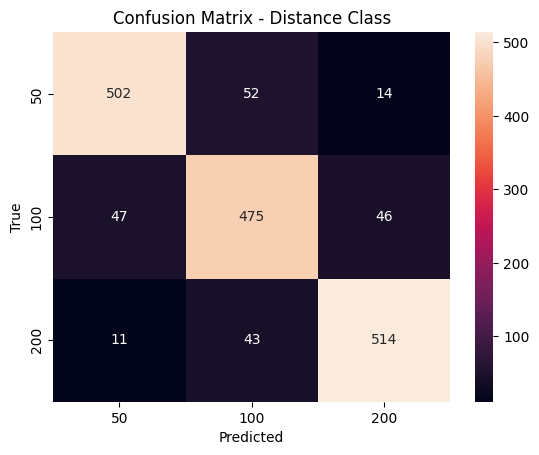

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_predict
modelC = RandomForestClassifier(n_estimators=100, random_state=42)
# Cross validation prediction
y = df_melted['Distance']
kf = KFold(n_splits=10, shuffle=True, random_state=42)
y_predC = cross_val_predict(modelC, X, y, cv=kf)

# Valutazione
print("Accuracy:", accuracy_score(y, y_predC))
print(classification_report(y, y_predC))

# Visualizzo la matrice di confusione
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import numpy as np
classes = np.unique(y)
cm = confusion_matrix(y, y_predC, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Distance Class")
plt.show()

In [79]:
modelC.fit(X, y)
new_sample = pd.DataFrame({
    "Concentration (mg/m3)": [0.5],
    "Wind-Dir (%)": [10],
    "Height (m)": [5],
    "Degrees": [45]
})
predicted_distance = modelC.predict(new_sample)
print(f"Predicted Distance for new sample: {predicted_distance[0]} m")

Predicted Distance for new sample: 200 m
